In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('D:/project/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
data.shape

(1000, 2)

In [4]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [8]:
# data preprocessining
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pakal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#cleaning the reviews
corpus=[]
for i in range(0,1000):
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
    review=review.lower()
    review_words=review.split()
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
    print(review_words)
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review_words]
    review=' '.join(review)
    corpus.append(review)

['wow', 'loved', 'place']
['crust', 'good']
['tasty', 'texture', 'nasty']
['stopped', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommendation', 'loved']
['selection', 'menu', 'great', 'prices']
['getting', 'angry', 'want', 'damn', 'pho']
['honeslty', 'taste', 'fresh']
['potatoes', 'like', 'rubber', 'could', 'tell', 'made', 'ahead', 'time', 'kept', 'warmer']
['fries', 'great']
['great', 'touch']
['service', 'prompt']
['would', 'go', 'back']
['cashier', 'care', 'ever', 'say', 'still', 'ended', 'wayyy', 'overpriced']
['tried', 'cape', 'cod', 'ravoli', 'chicken', 'cranberry', 'mmmm']
['disgusted', 'pretty', 'sure', 'human', 'hair']
['shocked', 'signs', 'indicate', 'cash']
['highly', 'recommended']
['waitress', 'little', 'slow', 'service']
['place', 'worth', 'time', 'let', 'alone', 'vegas']
['like']
['burrittos', 'blah']
['food', 'amazing']
['service', 'also', 'cute']
['could', 'care', 'less', 'interior', 'beautiful']
['performed']
['right', 'red', 'velvet', 'cake', 'ohhh', 'stuf

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:, 1].values

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [144]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [145]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100, criterion='entropy',max_features='log2')  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', max_features='log2')

In [146]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [147]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)
print("Accuracy:{}%".format(round(score1*100,2)))
print("Precision:{}%".format(round(score2*100,2)))
print("Recall:{}%".format(round(score3*100,2)))

Accuracy:72.5%
Precision:88.71%
Recall:53.4%


In [148]:
from sklearn.metrics import confusion_matrix   # making confusion matrix
cm=confusion_matrix(y_test,y_pred)

In [149]:
cm

array([[90,  7],
       [48, 55]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual values')

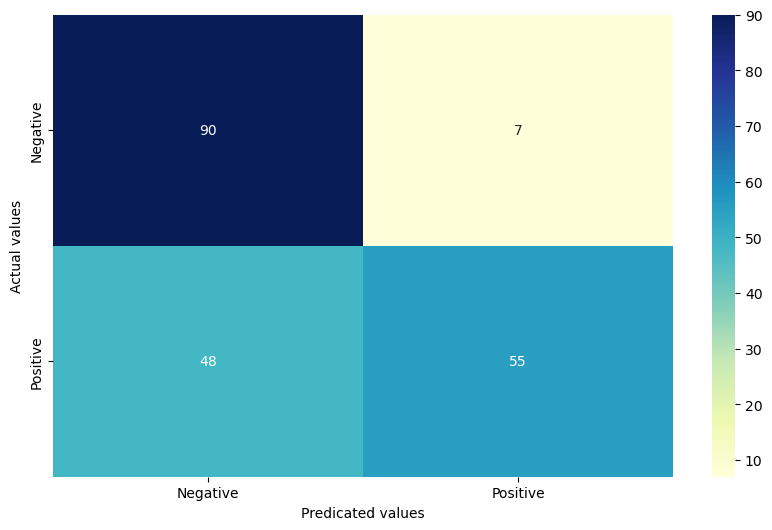

In [150]:
# plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')

In [151]:
best_accuracy=0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier=RandomForestClassifier(n_estimators= 100, criterion='entropy',max_features='log2')
    temp_classifier.fit(X_train,y_train)
    temp_y_pred=temp_classifier.predict(X_test)
    score=accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for alpha-{} is:{}%".format(round(i,1), round(score*100,2)))
    if(score>best_accuracy):
        best_accuracy=score
        alpha_val=i
print('---------------------------------------')
print('the best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))
    

Accuracy score for alpha-0.1 is:72.5%
Accuracy score for alpha-0.2 is:76.0%
Accuracy score for alpha-0.3 is:73.5%
Accuracy score for alpha-0.4 is:75.5%
Accuracy score for alpha-0.5 is:73.5%
Accuracy score for alpha-0.6 is:72.5%
Accuracy score for alpha-0.7 is:74.5%
Accuracy score for alpha-0.8 is:77.0%
Accuracy score for alpha-0.9 is:74.0%
Accuracy score for alpha-1.0 is:75.0%
---------------------------------------
the best accuracy is 77.0% with alpha value as 0.8


In [152]:
classifier=RandomForestClassifier(n_estimators= 100, criterion='entropy',max_features='log2')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2')

In [156]:
#prediction
def predict_sentiment(sample_review):
    sample_review= re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
    sample_review= sample_review.lower()
    sample_review_words=sample_review.split()
    sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps= PorterStemmer()
    final_review=[ps.stem(word) for word in sample_review_words]
    final_review=' '.join(final_review)
    temp=cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [157]:
#predicting values
sample_review='This food is really bad.'
if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!.')

This is a NEGATIVE review!.


In [158]:
sample_review='Wow... Loved this place.'
if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!.')

This is a POSITIVE review.
